In [2]:
import os
from nilearn import signal as sgl
from nilearn import image as img
from nilearn import plotting as plot
from nilearn import datasets
import nibabel as nib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import bids
%matplotlib inline

In [3]:
# Import atlas
atlas = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
# Loading atlas image stored in 'maps'
atlas_filename = atlas.maps
atlas_img, labels = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
# Loading atlas data stored in 'labels'
# labels = atlas['labels']

# Load the functional datasets
layout = bids.BIDSLayout('/Volumes/Seagate_Desktop_Drive/MFC_fMRIPREP/derivatives/fmriprep/',validate=False)

/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/bids/layout/models.py:148: FutureWarning: The 'extension' entity currently excludes the leading dot ('.'). As of version 0.14.0, it will include the leading dot. To suppress this warning and include the leading dot, use `bids.config.set_option('extension_initial_dot', True)`.
  warnings.warn("The 'extension' entity currently excludes the leading dot ('.'). "


In [4]:
#get func file
func_file = layout.get(subject='mfcc003', datatype='func', task='n1', suffix='bold',extension='.nii.gz',space='MNI152NLin6Asym')
func_mni = func_file[1].path
func_img = img.load_img(func_mni)

#get confounds
confound_file = layout.get(subject='mfcc003', datatype='func', extension='.tsv', task='n1', suffix='timeseries')
confound_file = confound_file[0]
confound_df = pd.read_csv(confound_file, delimiter = '\t').fillna(0)
confounds = confound_df.filter(regex='[rot,trans]_[xyz]$|[rot,trans]_[xyz]_derivative1$|a_comp_cor_0[0-1]|global_signal$|csf$|white_matter$')

In [5]:
atlas.maps

'/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz'

In [31]:
func_file

[<BIDSImageFile filename='/Volumes/Seagate_Desktop_Drive/MFC_fMRIPREP/derivatives/fmriprep/sub-mfcc003/func/sub-mfcc003_task-n1_acq-epi_rec-fmap_space-MNI152NLin6Asym_desc-smoothAROMAnonaggr_bold.nii.gz'>,
 <BIDSImageFile filename='/Volumes/Seagate_Desktop_Drive/MFC_fMRIPREP/derivatives/fmriprep/sub-mfcc003/func/sub-mfcc003_task-n1_acq-epi_rec-fmap_space-MNI152NLin6Asym_res-2_desc-preproc_bold.nii.gz'>]

In [6]:
from nilearn.input_data import NiftiLabelsMasker

masker = NiftiLabelsMasker(labels_img=atlas.maps, standardize=True,
                         memory='nilearn_cache', verbose=5)

time_series = masker.fit_transform(func_img)

[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
Resampling labels


/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/_utils/cache_mixin.py:118: UserWarning: Incompatible cache in nilearn_cache/joblib: different version of nibabel. Deleting the cache. Put nilearn.CHECK_CACHE_VERSION to false to avoid this behavior.
  warnings.warn("Incompatible cache in %s: "


________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7fa10e670b20>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7fa1249a32e0>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=5)
[NiftiLabelsMasker.transform_single_imgs] Loading data from Nifti1Image('/Volumes/Seagate_Desktop_Drive/MFC_fMRIPREP/derivatives/fmriprep/sub-mfcc003/func/sub-mfcc003_task-n1_acq-epi_rec-fmap_space-MNI1

/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.26s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


In [7]:
time_series_conf = masker.fit_transform(func_img, confounds)

[NiftiLabelsMasker.fit_transform] loading data from /Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(<nibabel.nifti1.Nifti1Image object at 0x7fa10e670b20>, <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7fa122f1e4f0>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': '/Users/alexjinich1/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=     global_signal         csf  white_matter  a_comp_cor_00  a_comp_cor_01  \
0       386.268412  550.376007    433.425929      -0.034

/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/nifti_labels_masker.py:299: UserWarning: Persisting input arguments took 1.24s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  region_signals, labels_ = self._cache(


In [11]:
### No Confounds

/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/plotting/matrix_plotting.py:22: MatplotlibDeprecationWarning: 
The inverse_transformed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use transformed(transform.inverted()) instead.
  ylabel_width = ax.yaxis.get_tightbbox(renderer).inverse_transformed(
/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/plotting/matrix_plotting.py:30: MatplotlibDeprecationWarning: 
The inverse_transformed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use transformed(transform.inverted()) instead.
  xlabel_height = ax.xaxis.get_tightbbox(renderer).inverse_transformed(


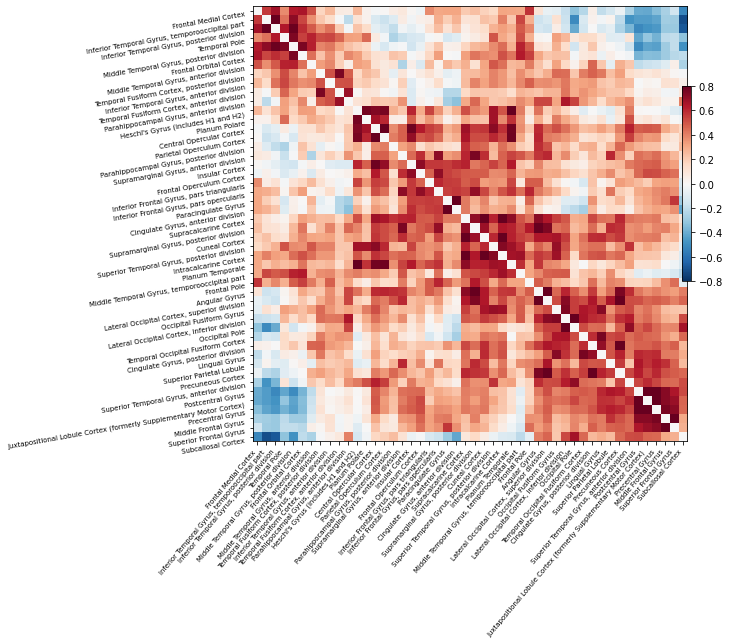

In [28]:
from nilearn.connectome import ConnectivityMeasure

correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([time_series])[0]

# Plot the correlation matrix
import numpy as np
from nilearn import plotting
# Make a large figure
# Mask the main diagonal for visualization:
np.fill_diagonal(correlation_matrix, 0)
# The labels we have start with the background (0), hence we skip the
# first label
labels=atlas[labels]
# matrices are ordered for block-like representation
plotting.plot_matrix(correlation_matrix, figure=(10, 8), labels=labels[1:],
                     vmax=0.8, vmin=-0.8, reorder=True)

In [27]:
## With Confounds

(48, 48)

/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/plotting/matrix_plotting.py:22: MatplotlibDeprecationWarning: 
The inverse_transformed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use transformed(transform.inverted()) instead.
  ylabel_width = ax.yaxis.get_tightbbox(renderer).inverse_transformed(
/Users/alexjinich1/opt/anaconda3/lib/python3.8/site-packages/nilearn/plotting/matrix_plotting.py:30: MatplotlibDeprecationWarning: 
The inverse_transformed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use transformed(transform.inverted()) instead.
  xlabel_height = ax.xaxis.get_tightbbox(renderer).inverse_transformed(


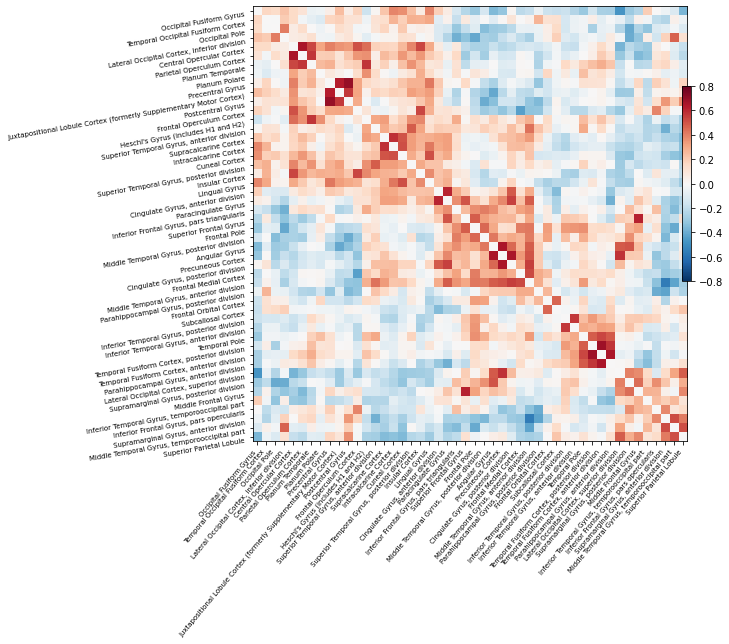

In [30]:
from nilearn.connectome import ConnectivityMeasure

correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([time_series_conf])[0]

# Plot the correlation matrix
import numpy as np
from nilearn import plotting
# Make a large figure
# Mask the main diagonal for visualization:
np.fill_diagonal(correlation_matrix, 0)
# The labels we have start with the background (0), hence we skip the
# first label

# matrices are ordered for block-like representation
plotting.plot_matrix(correlation_matrix, figure=(10, 8), labels=labels[1:],
                     vmax=0.8, vmin=-0.8, reorder=True)